In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
in_folder = '/home/ubuntu/dataset/train/'

names = []
for r, ds, fs in os.walk(in_folder):
    for f in fs:
        names.append(os.path.join(r, f))
        break

In [ ]:
print names

In [5]:
from joblib import Parallel, delayed
from data_augmentation import data_augmentation
from utils import bbox, create_fixed_image_shape

In [87]:
from skimage.io import imread, imsave
from skimage import img_as_float, img_as_uint
from skimage.filters.rank import subtract_mean
from skimage.morphology import disk

In [6]:
temp_shape = (300, 300, 3)
out_shape = (256, 256, 3)

In [3]:
def proc(name, k):
    im = cv2.imread(name)
    im.resize(temp_shape)
    imgs = data_augmentation(im, frame_size=out_shape)
    for i, img in enumerate(imgs):
        new_name = name.replace('/train/', '/train_aug/')
        new_name = new_name.replace('.jpeg', '_%d.jpeg' % i)
        cv2.imwrite(new_name, img)
    if k % 10 == 0:
        print "Completed %d." % k

In [75]:
im = cv2.imread('/home/ubuntu/dataset/validation_bkp/4/14849_right.jpeg').astype(np.int16)
print im.dtype

int16


In [76]:
mean_im = np.mean(im ,axis=0).mean(axis=0)
print "The mean is [%.2f, %.2f, %.2f]" % (mean_im[0], mean_im[1], mean_im[2])

The mean is [70.33, 73.51, 75.20]


In [78]:
gray_im = cv2.cvtColor(cv2.medianBlur(im.astype(np.uint8), 15), cv2.COLOR_BGR2GRAY)
mask = (gray_im > 2).astype(np.uint8)

In [79]:
mean_im = np.array(cv2.mean(im, mask)[:-1])
mean_im = mean_im[np.newaxis, np.newaxis, :]

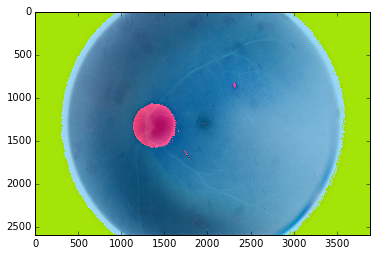

In [80]:
plt.imshow((im - mean_im)[:,:,::-1], cmap="jet");

In [ ]:
norm_img = subtract_mean(im, )

In [84]:
aa = skimage.img_as_uint((im - mean_im)[:,:,::-1])

ValueError: Images of type float must be between -1 and 1.

AttributeError: 'module' object has no attribute 'filters'

In [35]:
a = mean_im[np.newaxis, np.newaxis, :]
print a.shape

(1, 1, 3)


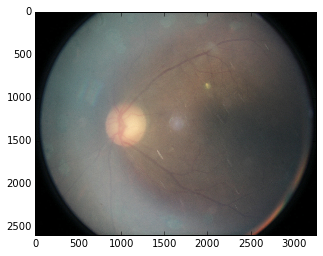

In [42]:
plt.imshow(bbox(im)[:,:,::-1])

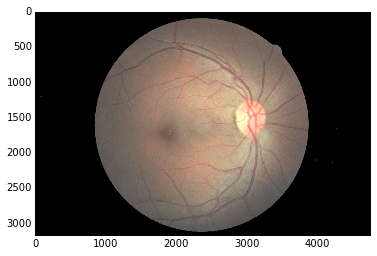

In [31]:
br = 40
a = im[:,:,::-1].copy().astype(np.uint16) + br
a[a>255] = 255
a[im[:,:,::-1]==0] = 0
plt.imshow(a.astype(np.uint8));

In [5]:
from utils import create_fixed_image_shape
from utils import bbox
from data_augmentation import data_augmentation

imre = create_fixed_image_shape(bbox(im), temp_shape, random_fill=False, mode='fit')
imgs = data_augmentation(imre, frame_size=out_shape)

30
28


In [6]:
for i in range(len(imgs)):
    img = imgs[i]
    imgs.append(img[:,::-1,:])

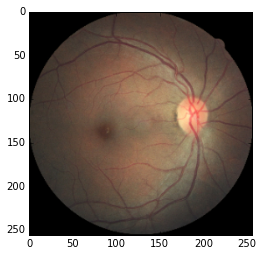

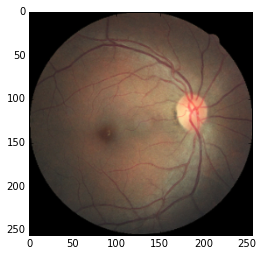

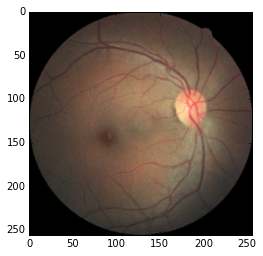

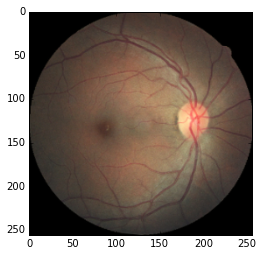

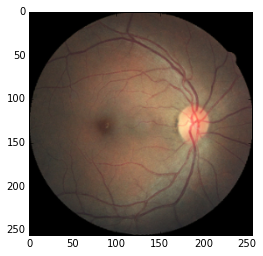

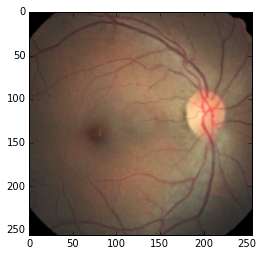

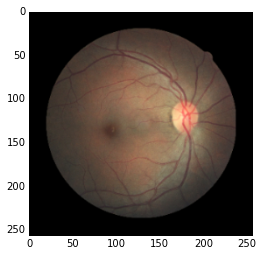

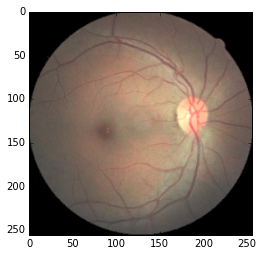

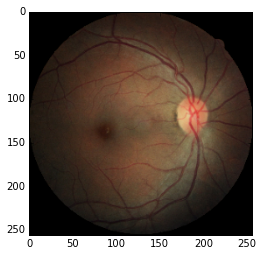

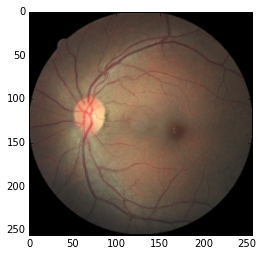

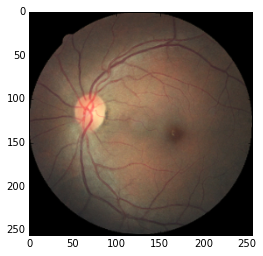

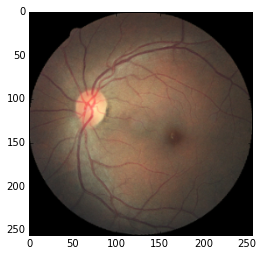

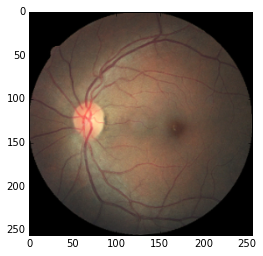

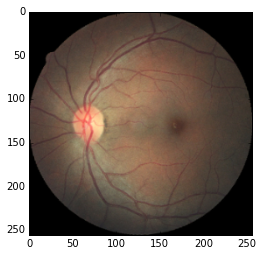

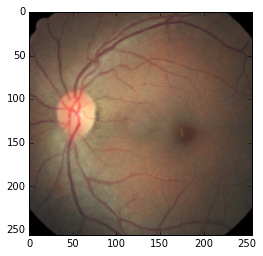

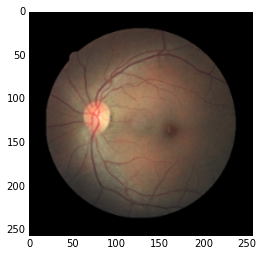

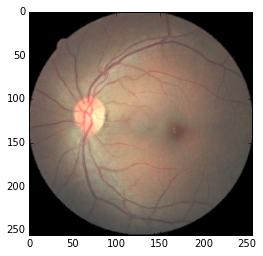

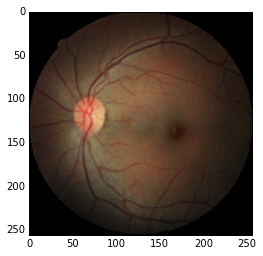

In [7]:
for i in range(len(imgs)):
    plt.figure()
    plt.imshow(imgs[i][:,:,::-1]);